<a href="https://colab.research.google.com/github/jiin124/Dacon/blob/main/%EC%86%8C%EB%B9%84%EC%9E%90_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B8%B0%EB%B0%98_%EC%86%8C%EB%B9%84_%EC%98%88%EC%B8%A1_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C/%EC%86%8C%EB%B9%84%EC%9E%90_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B8%B0%EB%B0%98_%EC%86%8C%EB%B9%84_%EC%98%88%EC%B8%A1_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C_5(0_17931)_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이콘 소비자 데이터 기반 소비 예측 경진대회_5차

-> id 삭제
id 삭제 안했을 때의 1차 결과보다 1점 내려감! 등수는 40->17
-> family(부양가족)
kid와 teen 수를 합친 컬럼. 이 컬럼을 만들고 kid와 teen은 삭제
-> 사용한 컬럼



```
'Education', 'Marital_Status', 'Income', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'target',
       'Year_Customer', 'family'
```



다음에는 이상치 삭제 후 시도해보고, 가장 점수가 높았던 2번째 시도 방법을 그대로 사용해보겠다. 


- id : 샘플 아이디
- Year_Birth : 고객 생년월일
- Education : 고객 학력
- Marital_status : 고객 결혼 상태
- Income : 고객 연간 가구 소득
- Kidhome : 고객 가구의 자녀 수
- Teenhome : 고객 가구의 청소년 수
- Dt_Customer : 고객이 회사에 등록한 날짜
- Recency : 고객의 마지막 구매 이후 일수
- NumDealsPurchases : 할인된 구매 횟수
- NumWebPurchases : 회사 웹사이트를 통한 구매 건수
- NumCatalogPurchases : 카탈로그를 사용한 구매 수 
- NumStorePuchases : 매장에서 직접 구매한 횟수
- NumWebVisitsMonth : 지난 달 회사 웹사이트 방문 횟수
- AcceptedCmp1: 고객이 첫 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp2: 고객이 두 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp3: 고객이 세 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp4: 고객이 네 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp5: 고객이 5번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- Complain : 고객이 지난 2년 동안 불만을 제기한 경우 1, 그렇지 않은 경우 0
- Response : 고객이 마지막 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- target : 고객의 제품 총 소비량

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install plotly==5.4.0

     |████████████████████████████████| 25.3 MB 34.8 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [ ]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (23.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falli

In [ ]:

#한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager,rc

font_path="/content/drive/MyDrive/NanumSquareB.ttf"
font=font_manager.FontProperties(fname=font_path)

In [ ]:

plt.rc('font',family='NanumBarunGothic')

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/소비예측/train.csv')
test=pd.read_csv('/content/drive/MyDrive/소비예측/test.csv')
sample=pd.read_csv('/content/drive/MyDrive/소비예측/sample_submission.csv')

In [ ]:
train.head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
0,0,1974,Master,Together,46014.0,1,1,21-01-2013,21,10,...,8,7,0,0,0,0,0,0,0,541
1,1,1962,Graduation,Single,76624.0,0,1,24-05-2014,68,1,...,7,1,1,0,0,0,0,0,0,899
2,2,1951,Graduation,Married,75903.0,0,1,08-04-2013,50,2,...,9,3,0,0,0,0,0,0,0,901
3,3,1974,Basic,Married,18393.0,1,0,29-03-2014,2,2,...,3,8,0,0,0,0,0,0,0,50
4,4,1946,PhD,Together,64014.0,2,1,10-06-2014,56,7,...,5,7,0,0,0,1,0,0,0,444


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1108 non-null   int64  
 1   Year_Birth           1108 non-null   int64  
 2   Education            1108 non-null   object 
 3   Marital_Status       1108 non-null   object 
 4   Income               1108 non-null   float64
 5   Kidhome              1108 non-null   int64  
 6   Teenhome             1108 non-null   int64  
 7   Dt_Customer          1108 non-null   object 
 8   Recency              1108 non-null   int64  
 9   NumDealsPurchases    1108 non-null   int64  
 10  NumWebPurchases      1108 non-null   int64  
 11  NumCatalogPurchases  1108 non-null   int64  
 12  NumStorePurchases    1108 non-null   int64  
 13  NumWebVisitsMonth    1108 non-null   int64  
 14  AcceptedCmp3         1108 non-null   int64  
 15  AcceptedCmp4         1108 non-null   i

데이터의 수가 많지는 않은 편. NULL값도 많지 않다. 

In [ ]:
train.describe()

,id,Year_Birth,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.00000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000
mean,553.500000,1968.701264,52075.809567,0.429603,0.511733,50.156137,2.33935,4.184116,2.690433,5.905235,5.348375,0.069495,0.085740,0.072202,0.068592,0.015343,0.009025,0.141697,617.121841
std,319.996354,12.225380,21310.093395,0.545582,0.551624,29.085582,1.94328,2.810556,2.792236,3.306812,2.405115,0.254408,0.280106,0.258939,0.252873,0.122968,0.094614,0.348896,603.587972
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,276.750000,1959.000000,35768.500000,0.000000,0.000000,25.000000,1.00000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.750000
50%,553.500000,1970.000000,51609.500000,0.000000,0.000000,51.000000,2.00000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,412.000000
75%,830.250000,1977.000000,68325.000000,1.000000,1.000000,76.000000,3.00000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1068.750000
max,1107.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,15.00000,27.000000,11.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2525.000000


## EDA 전 간단한 전처리

- Dt_Customer : datetime으로 바꾸고, 년도 분리 
- Dt_Customer 

In [ ]:
train['Dt_Customer'] = pd.to_datetime(train['Dt_Customer'])
test['Dt_Customer'] = pd.to_datetime(test['Dt_Customer'])

In [ ]:
train['Year_Customer'] = pd.DatetimeIndex(train['Dt_Customer']).year
test['Year_Customer'] = pd.DatetimeIndex(test['Dt_Customer']).year

In [ ]:
train.head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,Year_Customer
0,0,1974,Master,Together,46014.0,1,1,2013-01-21,21,10,...,7,0,0,0,0,0,0,0,541,2013
1,1,1962,Graduation,Single,76624.0,0,1,2014-05-24,68,1,...,1,1,0,0,0,0,0,0,899,2014
2,2,1951,Graduation,Married,75903.0,0,1,2013-08-04,50,2,...,3,0,0,0,0,0,0,0,901,2013
3,3,1974,Basic,Married,18393.0,1,0,2014-03-29,2,2,...,8,0,0,0,0,0,0,0,50,2014
4,4,1946,PhD,Together,64014.0,2,1,2014-10-06,56,7,...,7,0,0,0,1,0,0,0,444,2014


In [ ]:
train.drop('Dt_Customer',axis=1,inplace=True)
test.drop('Dt_Customer',axis=1,inplace=True)

## EDA

### 고객 정보

In [ ]:
train.columns

Index(['id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'target', 'Year_Customer'],
      dtype='object')

In [ ]:
customer=['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency','Year_Customer']

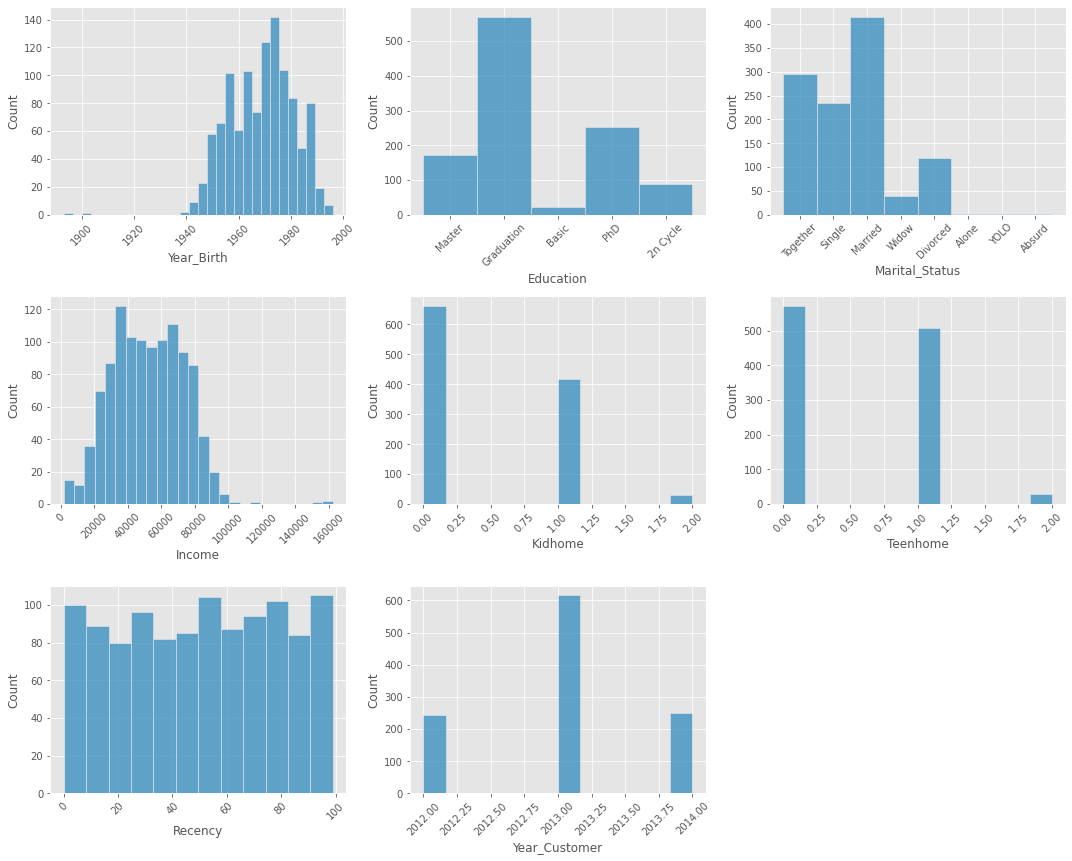

In [ ]:
plt.figure(figsize=(15,12))
for i,colName in enumerate(customer):
  plt.subplot(3,3,i+1)
  sns.histplot(train.loc[:,colName])
  plt.xticks(rotation=45)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

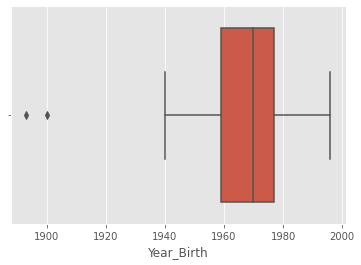

In [ ]:
#고객 생년
sns.boxplot(data=train,x='Year_Birth')

보통 1970년대 내외.

이상치값 :  1900년 이전에 태어난 사람들이 있다.. 

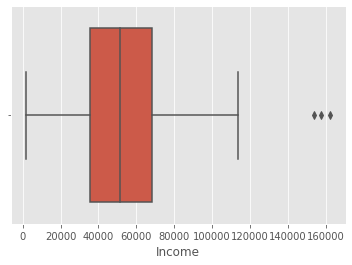

In [ ]:
#고객 연간 가구 소득
sns.boxplot(data=train,x='Income')

outlier가 있다. 데이터가 작아서 삭제할지말지 고민해봐야겠다. 

<정리>

- 고객생년월일 : 평균값이 1970년
- 고객 학력 : Graduation이 가장 많음
- 고객 결혼 상태 : 결혼한 사람들이 많음 
- 연간 가구 소득 : 50000내외
- 고객 가구의 자녀 수 : 0명이 가장 많음
- 고객 청소년 수 : 0명이 가장 많음
- 고객 시작 년도 : 2013년이 가장 많음 

### 소비에 대한 정보

In [ ]:
consumption=['NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth']

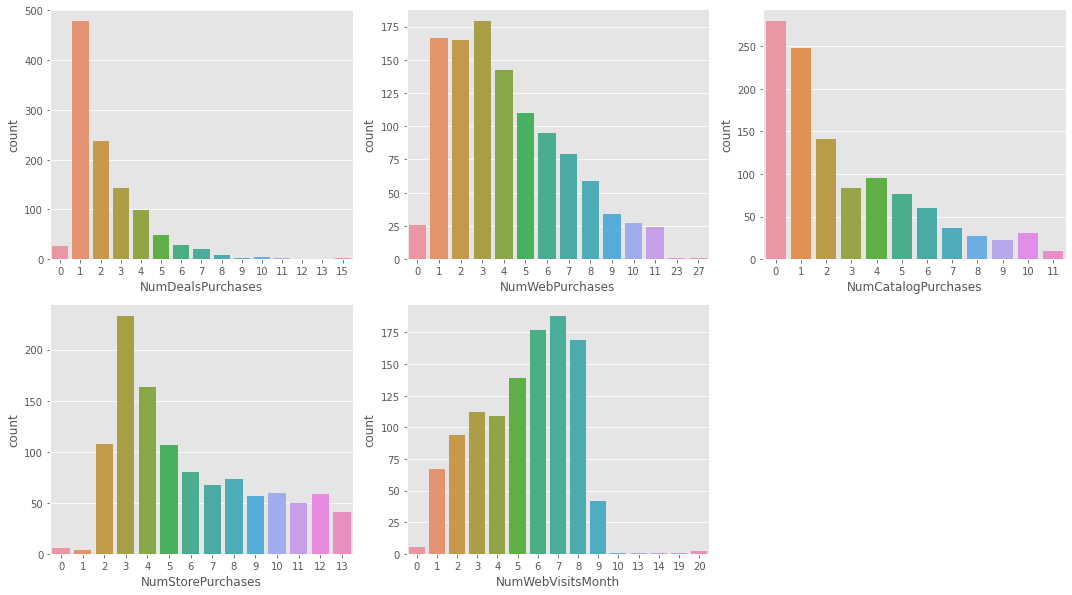

In [ ]:
plt.figure(figsize=(15,12))
for i,colName in enumerate(consumption):
  plt.subplot(3,3,i+1)
  sns.countplot(train.loc[:,colName])

plt.tight_layout()
plt.show()

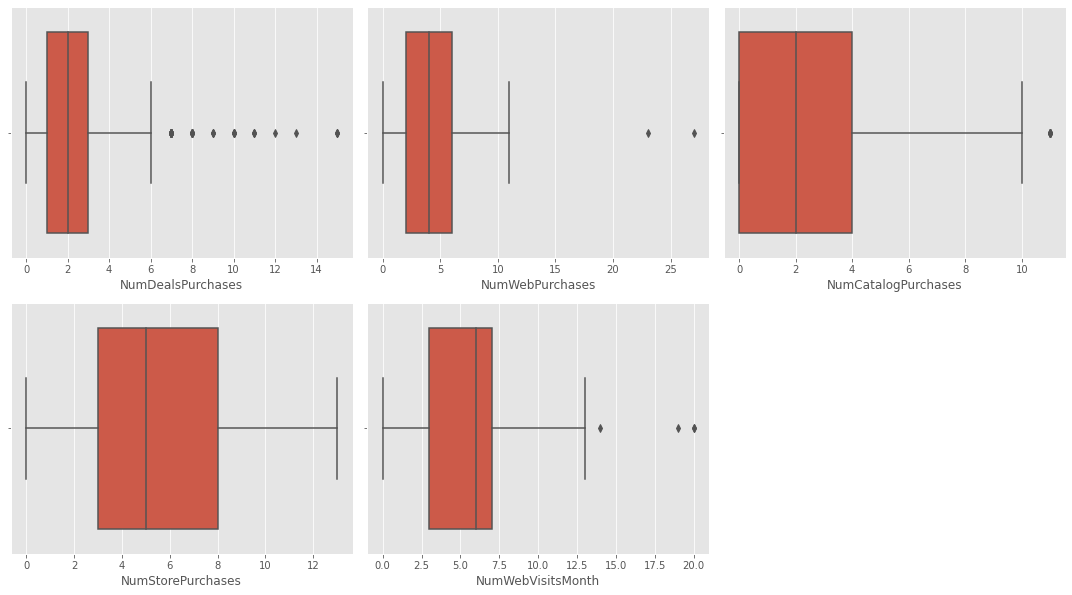

In [ ]:
plt.figure(figsize=(15,12))
for i,colName in enumerate(consumption):
  plt.subplot(3,3,i+1)
  sns.boxplot(train.loc[:,colName])

plt.tight_layout()
plt.show()

<정리>

-  할인된 구매횟수(NumEdalsPurchases) : 2회
- 회사 웹사이트를 통한 구매건수(NumWebpurchases) : 4회 정도
- 카탈로그를 사용한 구매수(NumCatalogPurchases) : 2회 내외
- 매장에서 직접 구매한 횟수(Numstorepuchases) : 5회 내외
- 지난 달 회사 웹사이트 방문(NumWebVisitMonth) : 6회 내외

### 캠페인 관련 컬럼

In [ ]:
cam=[ 'AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'Complain', 'Response']

In [ ]:
#원형그래프 함수
def circle(name):
  plt.figure(figsize=(5,5))
  plt.pie(train[name].value_counts(),
       labels=train[name].value_counts().index,
       autopct='%d%%',
       colors=sns.color_palette('hls',len(train[name].value_counts().index)),
       textprops={'fontsize':12})
  plt.axis('equal')
  plt.title(name, fontsize=16, pad=50)
  plt.show()

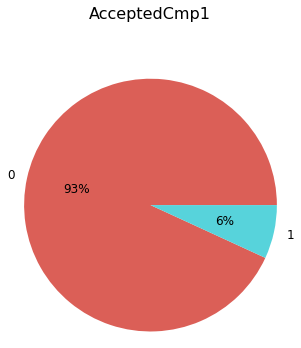

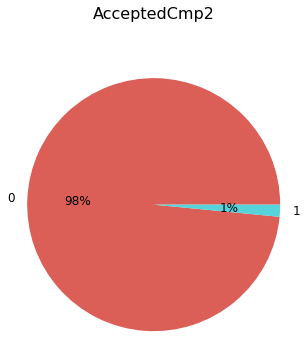

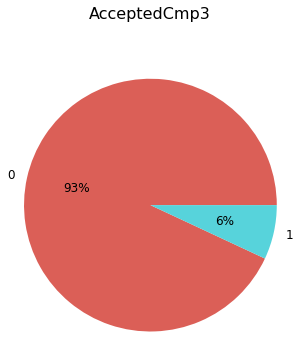

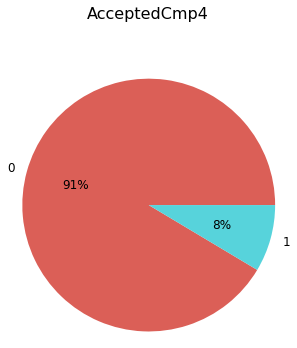

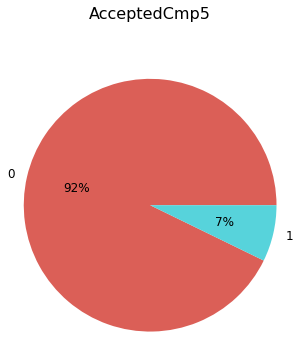

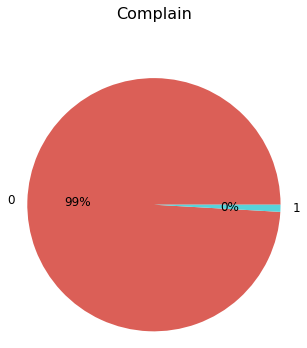

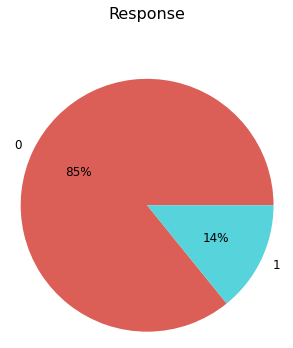

In [ ]:

for i,colName in enumerate(cam):
  circle(colName)



### target

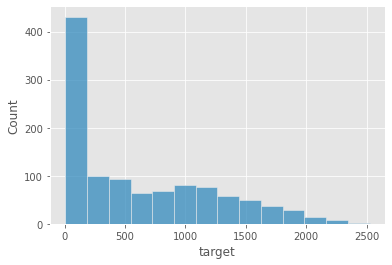

In [ ]:
sns.histplot(data=train,x='target')

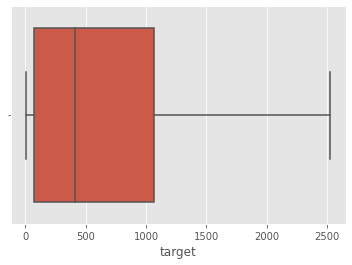

In [ ]:
sns.boxplot(data=train,x='target')

### 상관관계분석

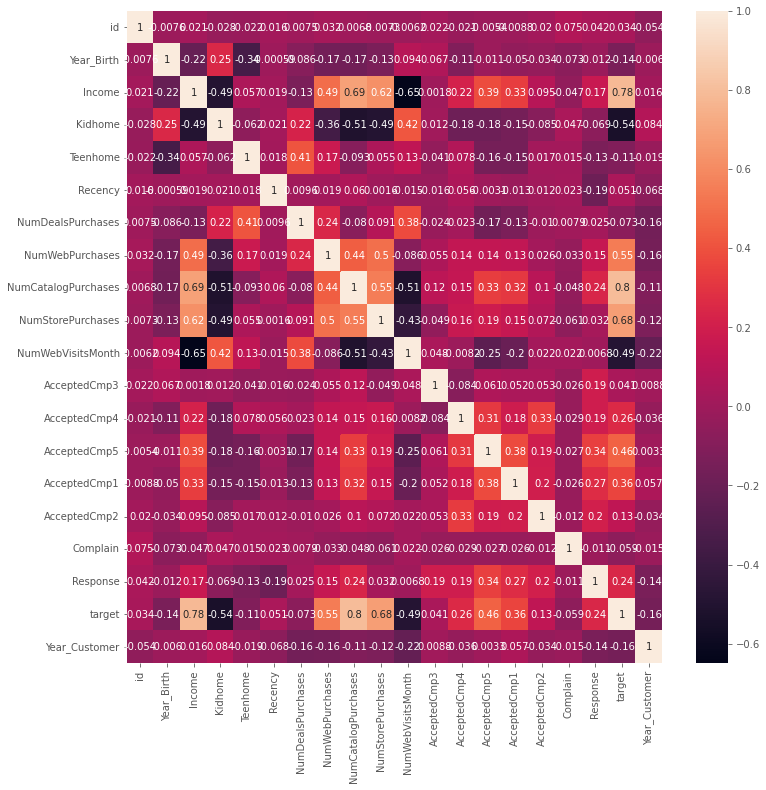

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(train.corr(),annot=True)

target 값인 고객의 제품 총 소비량은 NumCatalogPurchases(카탈로그를 사용한 구매수)와 가장 상관관계가 높았다.그리고 역시나 Income(연간소득)과도 상관관계가 높았고 NumstorePurchases와도 상관관계가 높았다. 



## 데이터 전처리

- object 형식 바꾸기
- 파생변수 만들기

Education,Marital_Status 형식 바꾸기

In [ ]:
train['Education'].value_counts()

Graduation    570
PhD           254
Master        173
2n Cycle       89
Basic          22
Name: Education, dtype: int64

In [ ]:
train['Marital_Status'].value_counts()

Married     415
Together    296
Single      234
Divorced    120
Widow        39
Alone         2
YOLO          1
Absurd        1
Name: Marital_Status, dtype: int64

#### Education 인코딩

label encoding 사용하여 학사->석사->박사 순으로 인코딩

- 학사 = 0, Basic, Graduation
- 석사 = 1, 2n Cycle, Master
- 박사 = 2, PhD

https://dacon.io/competitions/official/235893/codeshare/4880?page=1&dtype=recent

In [ ]:
mapping={'Graduation':0,'Basic':1,'2n Cycle':1,'Master':1,'PhD':2}

In [ ]:
train['Education']=train['Education'].map(mapping)
test['Education']=test['Education'].map(mapping)

In [ ]:
train['Education'].value_counts()


0    570
1    284
2    254
Name: Education, dtype: int64

#### Marital_Status

- 결혼, 동거 = 0, Married, Together
- 싱글 = 1, Single, Divorced, Widow, Alone, YOLO, Absurd

In [ ]:
mapping={'Married':0,'Together':0,'Single':1,'Divorced':1,'Widow':1,'Alone':1,'YOLO':1,'Absurd':1}

In [ ]:
train['Marital_Status']=train['Marital_Status'].map(mapping)
test['Marital_Status']=test['Marital_Status'].map(mapping)

In [ ]:
train['Marital_Status'].value_counts()

0    711
1    397
Name: Marital_Status, dtype: int64

#### 구매한 횟수

Num~ 변수들을 모두 합한 변수. 이건 모델링 후에 해보겠음


In [ ]:
#train['Purchases']=train['NumDealsPurchases']+train['NumWebPurchases']+train['NumCatalogPurchases']+train['NumStorePurchases']+train['NumWebVisitsMonth']
#test['Purchases']=test['NumDealsPurchases']+test['NumWebPurchases']+test['NumCatalogPurchases']+test['NumStorePurchases']+test['NumWebVisitsMonth']

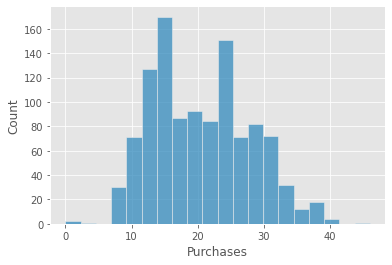

In [ ]:
#sns.histplot(data=train,x='Purchases')

#### 캠페인 제안 횟수

캠페인 제안 횟수를 모두 더한 것. 이것도 모델링 후에 시도 .

In [ ]:
#train['cmp']=train['AcceptedCmp1']+train['AcceptedCmp2']+train['AcceptedCmp3']+train['AcceptedCmp4']+train['AcceptedCmp5']
#test['cmp']=test['AcceptedCmp1']+test['AcceptedCmp2']+test['AcceptedCmp3']+test['AcceptedCmp4']+test['AcceptedCmp5']

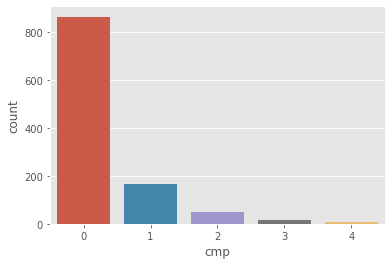

In [ ]:
#sns.countplot(data=train,x='cmp')

### 상관관계 다시 확인

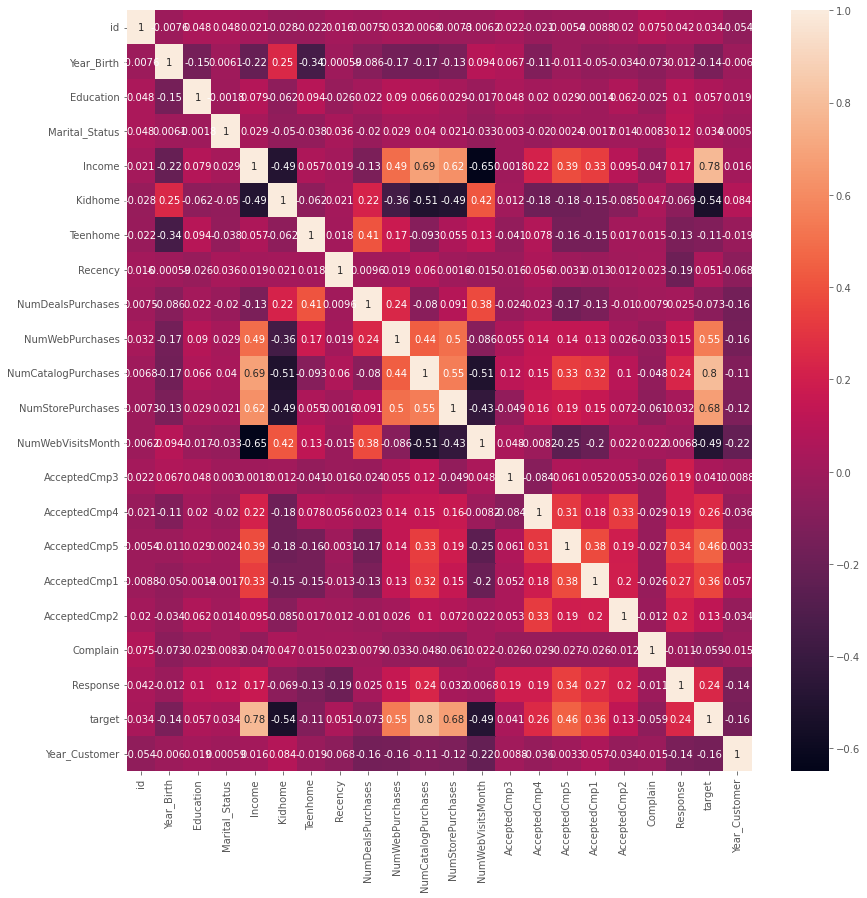

In [ ]:
plt.figure(figsize=(14,14))
sns.heatmap(train.corr(),annot=True)

In [ ]:
train.columns

Index(['id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'target', 'Year_Customer',
       'Purchases', 'cmp'],
      dtype='object')

In [ ]:
#상관관계 낮은 거 삭제
#train.drop(['id','Year_Birth'],axis=1,inplace=True)
#test.drop(['id','Year_Birth'],axis=1,inplace=True)

In [ ]:
#확인
train.columns

Index(['id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'target', 'Year_Customer'],
      dtype='object')

In [ ]:
#확인
test.columns

Index(['id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Year_Customer'],
      dtype='object')

### 상관관계 다시 확인

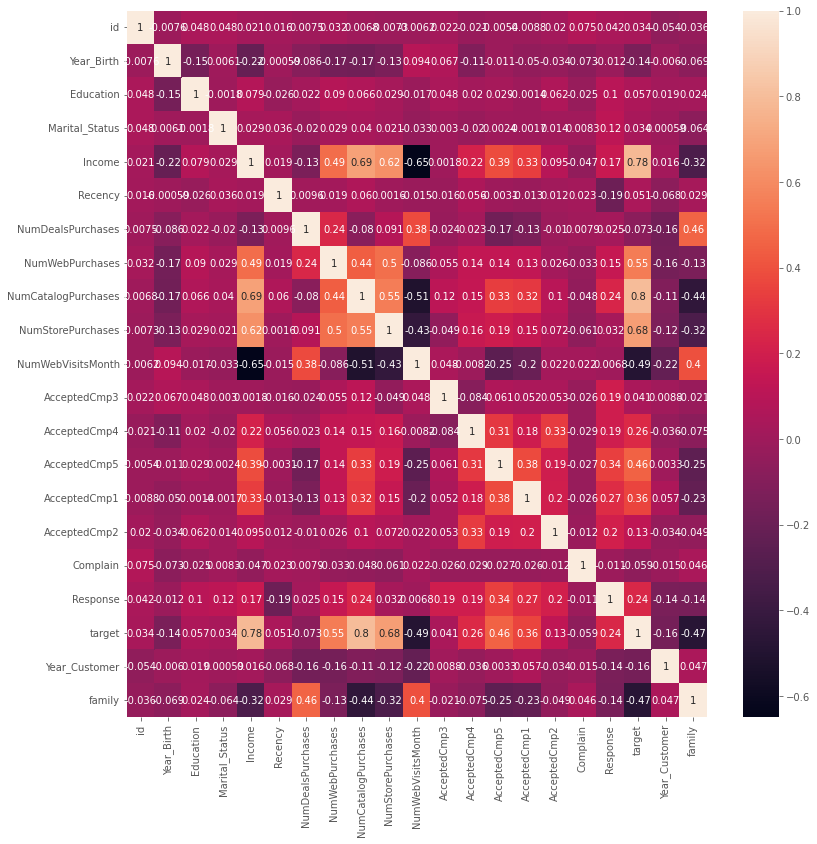

In [ ]:
plt.figure(figsize=(13,13))
sns.heatmap(train.corr(),annot=True)

### 부양가족 수

In [ ]:
train.columns

Index(['id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'target', 'Year_Customer'],
      dtype='object')

In [ ]:
train['family']=train['Kidhome']+train['Teenhome']
test['family']=test['Kidhome']+test['Teenhome']

In [ ]:
train.drop(['Kidhome','Teenhome'],axis=1,inplace=True)
test.drop(['Kidhome','Teenhome'],axis=1,inplace=True)

#### 마무리 삭제 

In [ ]:
train.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'target',
       'Year_Customer', 'family'],
      dtype='object')

In [ ]:
test.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Year_Customer',
       'family'],
      dtype='object')

In [ ]:
train.drop(['id', 'Year_Birth'],axis=1,inplace=True)
test.drop(['id', 'Year_Birth'],axis=1,inplace=True)


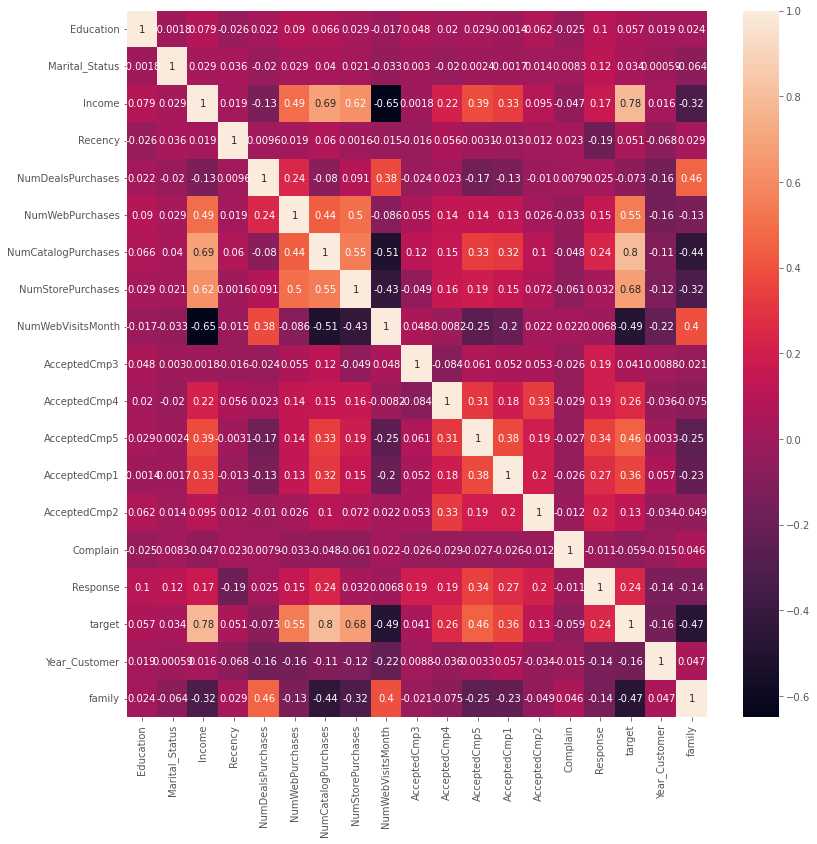

In [ ]:
plt.figure(figsize=(13,13))
sns.heatmap(train.corr(),annot=True)

In [ ]:
train.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'target',
       'Year_Customer', 'family'],
      dtype='object')

## 데이터셋 나누기

In [ ]:
X_train=train.drop('target',axis=1)
y_train=train['target']


## 모델링

In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import GridSearchCV

estimators=[]

lgbm=LGBMRegressor()
estimators.append(lgbm)

xgb=XGBRegressor()
estimators.append(xgb)

cat=CatBoostRegressor()
estimators.append(cat)

params=[]


params_lgbm={
    'n_estimatros':[100,300,500],
    'learning_rate':[0.05,0.1,0.3],
     'max_depth':[3,5,7],
}
params.append(params_lgbm)

params_xgb={
    'n_estimatros':[100,300,500],
    'learning_rate':[0.05,0.1,0.3],
     'max_depth':[3,5,7],
     'subsample':[0.1,0.3]
}
params.append(params_xgb)

params_cat={
    
}
params.append(params_cat)

In [ ]:
from tqdm.auto import tqdm#진행도를 확인하는 것

def gridSearchCV(models,params):
  best_models=[]

  for i in tqdm(range(0,len(models))):
    model_grid=GridSearchCV(models[i],params[i],n_jobs=-1,verbose=1,cv=5)
    model_grid.fit(X_train,y_train)
    best_models.append(model_grid.best_estimator_)
  return best_models


best_model_list=gridSearchCV(estimators,params)

  0%|          | 0/3 [00:00<?, ?it/s]

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
[10:26:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Learning rate set to 0.041612
0:	learn: 585.2747819	total: 1.62ms	remaining: 1.62s
1:	learn: 567.5569421	total: 2.97ms	remaining: 1.48s
2:	learn: 551.1073281	total: 4.65ms	remaining: 1.54s
3:	learn: 534.8459691	total: 6.49ms	remaining: 1.61s
4:	learn: 520.3069276	total: 7.67ms	remaining: 1.53s
5:	learn: 506.3702838	total: 9.04ms	remaining: 1.5s
6:	learn: 492.0423368	total: 10.4ms	remaining: 1.48s
7:	learn: 478.3848393	total: 11.6ms	remaining: 1.44s
8:	learn: 466.0653272	total: 12.8ms	remaining: 1.41s
9:	learn: 453.2228214	total: 14.2ms	remaining: 1.41s
10:	learn: 441.1670765	total: 15.8ms	remaining: 1.42s
11:	learn: 429.5678574	total: 17.4ms	remaining: 1.44s
12:	learn: 418.7853081	

In [ ]:
#최고의 모델 확인
best_model_list

[LGBMRegressor(learning_rate=0.05, max_depth=7, n_estimatros=100),
 XGBRegressor(n_estimatros=100, subsample=0.3),

In [ ]:
best_models=[
    ('cat',CatBoostRegressor()),
    ('xgb',XGBRegressor(n_estimatros=100, subsample=0.3)),
    ('lgbm',LGBMRegressor(learning_rate=0.05, max_depth=7, n_estimatros=100))
]

from sklearn.ensemble import VotingRegressor

voting_rg=VotingRegressor(estimators=best_models)
voting_rg.fit(X_train,y_train)

Learning rate set to 0.041612
0:	learn: 585.2747819	total: 4.19ms	remaining: 4.18s
1:	learn: 567.5569421	total: 10.8ms	remaining: 5.36s
2:	learn: 551.1073281	total: 13.1ms	remaining: 4.37s
3:	learn: 534.8459691	total: 17.9ms	remaining: 4.46s
4:	learn: 520.3069276	total: 22.8ms	remaining: 4.54s
5:	learn: 506.3702838	total: 27.6ms	remaining: 4.57s
6:	learn: 492.0423368	total: 32.5ms	remaining: 4.62s
7:	learn: 478.3848393	total: 37.1ms	remaining: 4.61s
8:	learn: 466.0653272	total: 41.5ms	remaining: 4.57s
9:	learn: 453.2228214	total: 46.4ms	remaining: 4.59s
10:	learn: 441.1670765	total: 51ms	remaining: 4.58s
11:	learn: 429.5678574	total: 55.5ms	remaining: 4.57s
12:	learn: 418.7853081	total: 60.2ms	remaining: 4.57s
13:	learn: 407.7130503	total: 66.4ms	remaining: 4.67s
14:	learn: 397.5468409	total: 69ms	remaining: 4.53s
15:	learn: 387.9596644	total: 73.7ms	remaining: 4.53s
16:	learn: 378.3431357	total: 81.3ms	remaining: 4.7s
17:	learn: 369.6706283	total: 83.9ms	remaining: 4.58s
18:	learn: 36

VotingRegressor(estimators=[('cat',
                             <catboost.core.CatBoostRegressor object at 0x7f5a51c68e90>),
                            ('xgb',
                             XGBRegressor(n_estimatros=100, subsample=0.3)),
                            ('lgbm',
                             LGBMRegressor(learning_rate=0.05, max_depth=7,
                                           n_estimatros=100))])

In [ ]:
pred=voting_rg.predict(test)

In [ ]:
sample['target']=pred
sample.head()

,id,target
0,0,573.670798
1,1,765.741878
2,2,788.398445
3,3,1137.266703
4,4,1389.804813


In [ ]:
sample.to_csv("sample_5.csv",index=False)